In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
df=pd.read_csv('/content/IMDB Dataset.csv', encoding='utf-8',on_bad_lines='skip')
print(df.head(3))
print(df.shape)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep only letters
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(preprocess_text)
x=df['clean_review']
y=df['sentiment']
print(x.shape)
print(y.shape)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x_vec = vectorizer.fit_transform(x)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
(50000, 2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


(50000,)
(50000,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [5]:
y_pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n")
print(cm)
roc_score = roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])
print(f"ROC AUC Score: {roc_score:.4f}")

Accuracy: 88.94%

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix : 

[[4340  621]
 [ 485 4554]]
ROC AUC Score: 0.9579


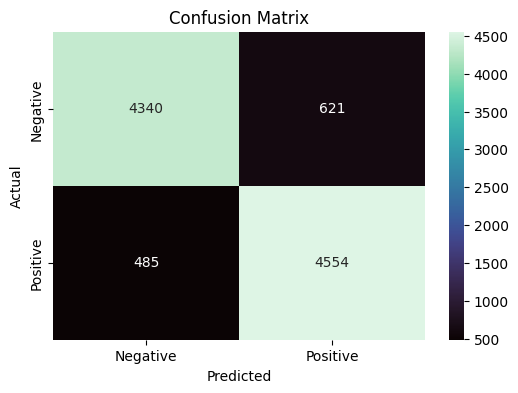

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
palette = sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap=palette, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()